**Descripción del conjunto de datos**

El conjunto de datos para esta competencia (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en Credit Card Fraud Detection . Las distribuciones de características son similares, pero no exactamente iguales, a las del original. Siéntase libre de usar el conjunto de datos original como parte de esta competencia, tanto para explorar las diferencias como para ver si incorporar el original en el entrenamiento mejora el rendimiento del modelo.

Tenga en cuenta que este conjunto de datos base para esta competencia era mucho más grande que los conjuntos de datos anteriores de Tabular Tuesday y, por lo tanto, puede contener más artefactos que las últimas tres competencias.

**Archivos:**

    train.csv - el conjunto de datos de entrenamiento; Classes el objetivo
    test.csv - el conjunto de datos de prueba; tu objetivo es predecirClass
    sample_submission.csv : un archivo de envío de muestra en el formato correcto


**Documentación:**

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las funciones originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

Dada la relación de desequilibrio de clase, recomendamos medir la precisión utilizando el área bajo la curva de recuperación de precisión (AUPRC). La precisión de la matriz de confusión no es significativa para la clasificación desequilibrada.


**Evaluación:**

Las presentaciones se evalúan en el área bajo la curva ROC entre la probabilidad pronosticada y el objetivo observado.

Para cada uno iden el conjunto de prueba, debe predecir el valor del objetivo Class. El archivo debe contener un encabezado y tener el siguiente formato:

    id,Class
    341588,0.23
    341589,0.92
    341590,0.02
    etc.

**REFERENCIAS:**

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson y Gianluca Bontempi. Calibración de probabilidad con submuestreo para clasificación desequilibrada. En Simposio sobre Inteligencia Computacional y Minería de Datos (CIDM), IEEE, 2015

Dal Pozolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Lecciones aprendidas en la detección de fraudes con tarjetas de crédito desde la perspectiva de un profesional , Sistemas expertos con aplicaciones, 41,10,4915-4928,2014, Pergamon

Dal Pozolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, César; Bontempi, Gianluca. Detección de fraude con tarjetas de crédito: un modelo realista y una estrategia de aprendizaje novedosa, transacciones IEEE en redes neuronales y sistemas de aprendizaje, 29,8,3784-3797,2018, IEEE

Dal Pozzolo, Andrea Adaptive Machine learning para la detección de fraudes con tarjetas de crédito Tesis doctoral de ULB MLG (supervisada por G. Bontempi)

Carcillo, Fabricio; Dal Pozolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: un marco escalable para transmitir la detección de fraudes con tarjetas de crédito con Spark , Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabricio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Transmisión de estrategias de aprendizaje activo para la detección de fraudes con tarjetas de crédito en la vida real: evaluación y visualización, International Journal of Data Science and Analytics, 5,4,285-300,2018, Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Técnicas de adaptación de dominios de aprendizaje profundo para la detección de fraudes con tarjetas de crédito , INNSBDDL 2019: Avances recientes en Big Data y aprendizaje profundo, págs. 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combinación de aprendizaje no supervisado y supervisado en ciencias de la información de detección de fraude con tarjetas de crédito , 2019

Yann-Aël Le Borgne, Gianluca Bontempi Aprendizaje automático reproducible para la detección de fraudes con tarjetas de crédito - Manual práctico

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Estrategias de aprendizaje incremental para la detección de fraudes con tarjetas de crédito , International Journal of Data Science and Analytics


# Librerias

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score,confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Lectura dataset

In [2]:
df_train = pd.read_csv(r'/Users/aitorelordizamora/Library/Mobile Documents/com~apple~CloudDocs/Datasets/datasets fraude/train.csv', sep=',')
df_test = pd.read_csv(r'/Users/aitorelordizamora/Library/Mobile Documents/com~apple~CloudDocs/Datasets/datasets fraude/test.csv', sep=',')

In [3]:
df_train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,0.858158,-0.280639,0.007976,-0.124950,0.914374,-0.073169,-2.309929,-0.041423,1.190526,-0.281848,-0.195703,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,-0.257933,-0.457534,0.516146,-0.071240,1.310799,-1.892909,-0.318780,-0.917395,0.098397,-0.195558,-0.116538,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,-0.136498,0.179926,-1.769641,-3.937694,0.031346,0.028100,0.883566,0.391801,1.007789,0.303376,-0.384830,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,1.536193,-0.058879,-0.885949,-0.254718,-0.425730,0.665556,-0.336634,0.301966,0.391249,0.037770,-0.190984,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


In [4]:
# Control valores nulos

value_null = df_train.isnull().any().any()
print("VALORES NULOS:",value_null)


# Control valores duplicados

value_dupli = df_train.duplicated().any()
print("VALORES DUPLICADOS:",value_dupli)

VALORES NULOS: False
VALORES DUPLICADOS: False


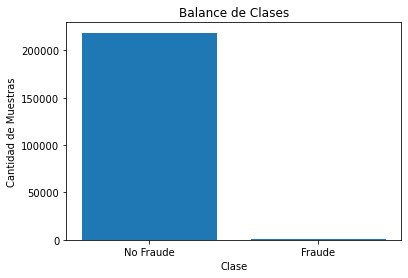

In [5]:
# Contar la cantidad de muestras por clase
class_counts = df_train['Class'].value_counts()

# Visualizar el balance de clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Clase")
plt.ylabel("Cantidad de Muestras")
plt.xticks(class_counts.index, ['No Fraude', 'Fraude'])
plt.title("Balance de Clases")
plt.show()

# ¿Hay desbalanceo en la muestra? Si

El desbalanceo en un problema de clasificación ocurre cuando las clases objetivo (etiquetas de salida) en el conjunto de datos no están representadas de manera equilibrada, es decir, una clase tiene muchas más muestras que las otras. En otras palabras, el número de muestras en una clase es significativamente mayor que el número de muestras en la otra(s) clase(s).

En problemas de clasificación binaria, el desbalanceo se refiere específicamente a una proporción desigual entre las dos clases. Por ejemplo, en un problema de detección de fraudes en transacciones bancarias, la clase "No Fraude" puede tener un número mucho mayor de muestras que la clase "Fraude" porque los casos de fraude son menos comunes en comparación con las transacciones regulares. En este caso, habría un desbalanceo de clases.

El desbalanceo puede ser problemático para el entrenamiento de modelos de clasificación, especialmente cuando se utiliza un algoritmo que no maneja automáticamente este desequilibrio. Algunas de las consecuencias del desbalanceo incluyen:


**Sesgo del modelo:** El modelo tiende a predecir con mayor precisión la clase mayoritaria y muestra una menor precisión para la clase minoritaria. Esto puede dar lugar a un rendimiento deficiente en la detección de la clase minoritaria (la clase que nos interesa detectar).


**Altas tasas de falsos negativos:** En el caso de detección de fraudes, por ejemplo, puede haber una alta tasa de falsos negativos, lo que significa que el modelo puede pasar por alto muchos casos de fraude y considerarlos como transacciones regulares.


**Menor rendimiento en métricas de evaluación:** Las métricas de evaluación, como la precisión, el recall y el AUC-ROC, pueden ser engañosas en un conjunto de datos desbalanceado, ya que el rendimiento general puede ser alto debido a la clasificación correcta de la clase mayoritaria, pero el rendimiento en la clase minoritaria es bajo.


Para abordar el problema del desbalanceo, se pueden aplicar técnicas de manejo de desbalanceo, como:


**Sobremuestreo de la clase minoritaria:** Aumentar artificialmente la cantidad de muestras de la clase minoritaria mediante técnicas como el duplicado de muestras existentes o la generación de nuevas muestras sintéticas.


**Submuestreo de la clase mayoritaria:** Reducir la cantidad de muestras de la clase mayoritaria para equilibrar la proporción entre las clases.


**Técnicas de generación de muestras sintéticas:** Utilizar algoritmos de generación de muestras sintéticas, como SMOTE (Synthetic Minority Over-sampling Technique), para crear muestras sintéticas de la clase minoritaria.


**Ensemble de modelos:** Utilizar técnicas de ensamble que den más peso o importancia a la clasificación de la clase minoritaria.

En este caso vamos a reralizar un submuestreo aleatorio de la clase mayoritiaria.

In [13]:
# Obtener los ejemplos de la clase mayoritaria (no fraude)
df_no_fraude = df_train[df_train['Class'] == 0]

# Obtener los ejemplos de la clase minoritaria (fraude)
df_fraude = df_train[df_train['Class'] == 1]

# Contar la cantidad de ejemplos en cada clase
cantidad_fraude = len(df_fraude)
cantidad_no_fraude = len(df_no_fraude)

# Realizar un submuestreo aleatorio de ejemplos de la clase mayoritaria para igualar la cantidad con la clase minoritaria
df_no_fraude_submuestreo = df_no_fraude.sample(cantidad_fraude, random_state=42)

# Concatenar los DataFrames del submuestreo de ambas clases
df_submuestreo = pd.concat([df_fraude, df_no_fraude_submuestreo])

In [14]:
df_submuestreo

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1681,1681,764.0,0.845797,-1.063059,0.120133,-0.312570,-0.056194,1.944391,-0.661839,0.582721,-0.992366,0.564202,1.766655,0.826499,-0.307964,0.393909,0.907691,-2.822682,1.055578,-1.061441,-2.138524,-0.569641,-0.430906,-0.919078,0.123612,-1.420935,-0.072559,0.293439,0.061270,0.006448,136.58,1
2039,2039,923.0,-1.808089,1.794735,-2.574549,-1.944174,-4.093440,-1.360198,-8.837694,-3.865127,4.847707,-1.826233,-1.552959,1.796523,-1.531125,-0.242458,0.926706,0.113577,-0.155949,0.393524,1.085312,1.570826,-2.662635,1.173416,-0.136751,0.739760,-0.692745,0.818293,0.745100,0.847648,2.00,1
2090,2090,1028.0,-0.368027,1.492913,0.653399,0.164478,-1.043918,0.766250,-2.717382,-6.944203,-0.938474,-1.243744,1.555025,2.133379,0.125978,1.131705,0.057716,0.944642,-0.440088,0.049590,-0.878509,1.180116,-0.058687,1.185031,0.290564,0.528459,0.764303,-0.017768,0.110884,0.307835,0.12,1
3072,3072,1328.0,1.990241,-0.185837,-1.039174,0.086245,0.107037,-0.409425,0.016713,-0.126446,0.279865,0.184726,1.090518,1.617814,0.906706,0.254738,-0.673049,0.193427,-0.771428,-0.214947,0.468155,-0.094906,-0.142725,-0.285513,0.263769,0.779628,-0.261358,0.255895,-0.074999,-0.059828,23.31,1
3780,3780,1438.0,-0.738582,0.654464,0.652465,-0.139933,1.183689,-0.037131,0.638169,0.136502,-0.357541,-0.238928,1.039441,0.302428,-1.116929,0.651270,-0.295048,-0.421716,-0.456629,-0.037795,-0.826278,-0.314816,0.167918,0.563421,0.012614,-0.311213,0.105798,-0.252849,0.049231,0.108966,4.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152502,152502,74519.0,-0.542603,1.037366,1.068337,1.542728,-0.301396,-0.352313,0.432223,0.310058,-1.010857,-0.302669,0.162488,0.347071,0.072635,0.587738,1.618737,-1.146813,0.899584,-0.636642,0.591515,0.017851,0.151789,0.465588,-0.037804,0.626771,-0.106476,-0.226849,0.039135,0.054134,30.50,0
146074,146074,73051.0,-0.288050,0.898128,-0.300410,-1.115681,2.555717,3.290488,0.111341,0.938372,-0.505607,-0.458735,-0.010370,-0.332758,-0.079074,-0.258360,1.098152,0.717568,-0.482274,0.323556,0.282911,0.223437,-0.312978,-1.006183,0.070168,0.935136,-0.007877,0.088017,0.246559,0.090918,0.89,0
188019,188019,83889.0,-7.273676,6.951918,-2.474800,-0.777529,-2.030513,-1.040049,0.756818,-0.264577,6.938351,10.937882,1.927668,-1.063928,-2.177964,-3.633680,1.291537,-0.099145,0.446978,0.955441,-0.019767,4.049605,-1.051739,0.001823,0.137514,0.547770,1.055813,0.186425,2.619544,0.897248,9.99,0
143935,143935,72701.0,-0.574065,-0.292358,2.169524,-2.672898,-0.965509,-0.002733,-0.541334,0.269455,-1.967277,0.851698,1.231799,-1.182779,-0.950756,-0.374868,-0.103539,-0.051808,0.221639,0.739480,-0.652975,-0.063476,-0.162909,-0.045403,-0.229738,-0.064985,0.622234,-0.167989,0.066573,-0.056308,16.42,0


# Visualizamos el Submuestreo

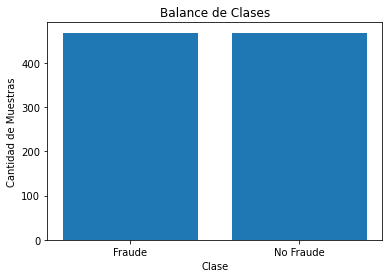

In [15]:
# Contar la cantidad de muestras por clase
class_counts = df_submuestreo['Class'].value_counts()

# Visualizar el balance de clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Clase")
plt.ylabel("Cantidad de Muestras")
plt.xticks(class_counts.index, ['No Fraude', 'Fraude'])
plt.title("Balance de Clases")
plt.show()

In [47]:
# Separar características y variable objetivo en el conjunto de entrenamiento
X = df_submuestreo.drop(['id', 'Class'], axis=1)  # Características
y = df_submuestreo[['Class']]  # Variable objetivo


# Obtener solo las columnas resultantes del PCA
X_pca = X[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

# Restar las columnas del PCA del conjunto de características original para obtener las características originales
X_original = X[['Time', 'Amount']]

# Preprocesar las características originales con StandardScaler
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

X_original_scaled = pd.DataFrame(X_original_scaled, columns=X_original.columns)

# Establecer el índice de ambos DataFrames como el mismo
X_original_scaled.index = X_pca.index

# Concatenar las características originales escaladas con las columnas del PCA (utilizando axis=1)
X_preprocesado = pd.concat([X_original_scaled, X_pca], axis=1)

# Dividir el conjunto de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_preprocesado, y, test_size=0.2, random_state=42)

In [48]:
# Crear y entrenar distintos clasificadores
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42)
}

results = {}

for name, classifier in classifiers.items():
    start_time = time.time()

    # Ajustar el clasificador en el conjunto de entrenamiento balanceado
    classifier.fit(X_train, y_train)

    # Evaluar el clasificador en el conjunto de validación
    y_pred = classifier.predict(X_val)
    auprc_score = average_precision_score(y_val, y_pred)

    end_time = time.time()
    training_time = end_time - start_time

    results[name] = {'AUPRC': auprc_score, 'Training Time (min)': round(training_time / 60, 2)}

# Imprimir los resultados
for name, metrics in results.items():
    print(f"{name} - AUPRC: {metrics['AUPRC']:.4f}, Training Time: {metrics['Training Time (min)']:.2f} minutes")


Logistic Regression - AUPRC: 0.6593, Training Time: 0.00 minutes
Gradient Boosting - AUPRC: 0.6406, Training Time: 0.02 minutes
Decision Tree - AUPRC: 0.5791, Training Time: 0.00 minutes
Gaussian Naive Bayes - AUPRC: 0.6842, Training Time: 0.00 minutes
XGBoost - AUPRC: 0.6345, Training Time: 0.02 minutes


In [49]:

import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Definir el clasificador XGBoost
xgb_model = XGBClassifier(random_state=42)

# Definir los hiperparámetros que deseamos ajustar
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=6, scoring='average_precision', cv=3)
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Obtener los mejores hiperparámetros y el mejor resultado de AUPRC
best_params = random_search.best_params_
best_auprc = random_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("AUPRC en el conjunto de entrenamiento:", round(best_auprc,2))

# Crear el modelo final con los mejores hiperparámetros
final_xgb_model = XGBClassifier(random_state=42, **best_params)

# Entrenar el modelo final en el conjunto de entrenamiento balanceado
final_xgb_model.fit(X_train, y_train)

# Evaluar el modelo final en el conjunto de validación
y_pred = final_xgb_model.predict(X_val)
final_auprc = average_precision_score(y_val, y_pred)

print("AUPRC del modelo final en el conjunto de validación:", round(final_auprc,2))
print("Tiempo de entrenamiento:", round(training_time / 60, 2), "minutos")

Mejores hiperparámetros: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
AUPRC en el conjunto de entrenamiento: 0.81
AUPRC del modelo final en el conjunto de validación: 0.63
Tiempo de entrenamiento: 0.09 minutos


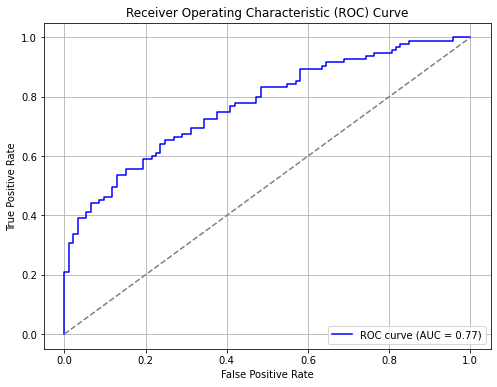

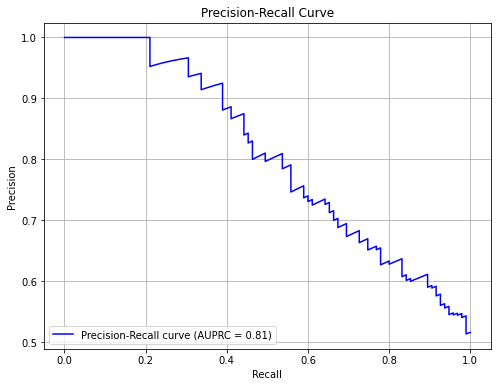

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Obtener las probabilidades de las clases positivas (fraude) del modelo final
y_prob = final_xgb_model.predict_proba(X_val)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

# Calcular la curva de precisión-recall (AUPRC)
precision, recall, _ = precision_recall_curve(y_val, y_prob)
auprc = average_precision_score(y_val, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve (AUPRC = {:.2f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


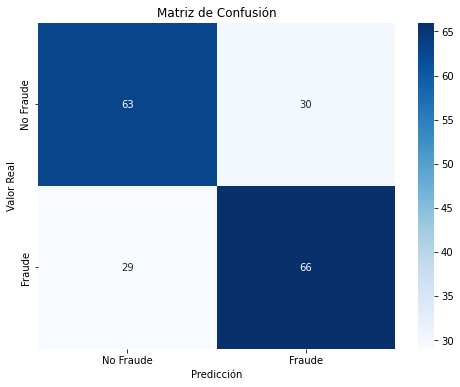

In [51]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Crear el mapa de calor (heatmap) para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [57]:
# Obtener solo las columnas resultantes del PCA
X_pca = df_test[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

X_test_original = df_test[['Time', 'Amount']]

# Preprocesar las características originales con StandardScaler usando el mismo scaler que utilizaste en el conjunto de entrenamiento
X_test_original_scaled = scaler.transform(X_test_original)
X_test_original_scaled = pd.DataFrame(X_test_original_scaled, columns=X_test_original.columns)

# Establecer el índice de ambos DataFrames como el mismo
X_test_original_scaled.index = X_pca.index

# Concatenar las características originales escaladas con las columnas del PCA (utilizando axis=1)
X_test_preprocesado = pd.concat([X_test_original_scaled, X_pca], axis=1)

# Realizar la predicción en el conjunto de prueba
y_test_pred = final_xgb_model.predict(X_test_preprocesado)

# Agregar las predicciones al DataFrame de prueba
df_test['Class'] = y_test_pred

# Ahora el DataFrame df_test tiene una columna adicional llamada 'Predicted_Class' con las predicciones del modelo
submission = df_test[['id','Class']]

submission

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0
...,...,...
146082,365211,0
146083,365212,0
146084,365213,0
146085,365214,0


In [58]:
submission.to_csv('fraude_submission.csv', index = False)

## Los tres algoritmos con mejor métrica son:

**Gradient Boosting:**

Gradient Boosting es un algoritmo de aprendizaje automático que se basa en la combinación de múltiples árboles de decisión más débiles para construir un modelo más fuerte. Cada árbol se construye secuencialmente para corregir los errores del árbol anterior. Esto se hace mediante el ajuste de los nuevos árboles a los residuos (diferencias) entre las predicciones del modelo actual y las etiquetas verdaderas. Al combinar varios árboles débiles, Gradient Boosting es capaz de lograr un buen rendimiento en una amplia variedad de problemas de aprendizaje supervisado.

**Gaussian Naive Bayes:**

Naive Bayes es un algoritmo de clasificación basado en el teorema de Bayes y la suposición de independencia condicional de las características. En el caso de Gaussian Naive Bayes, se asume que las características siguen una distribución gaussiana (normal). Aunque la suposición de independencia condicional puede no ser realista en muchos casos, el algoritmo sigue siendo efectivo en ciertos problemas, especialmente cuando hay muchas características y suficientes datos de entrenamiento. Es simple y rápido, y puede funcionar bien en problemas con características numéricas continuas.

**XGBoost:**

XGBoost (Extreme Gradient Boosting) es una implementación optimizada y eficiente del algoritmo Gradient Boosting. Utiliza técnicas de regularización, manejo de valores faltantes y paralelismo para mejorar el rendimiento y la generalización. XGBoost ha ganado mucha popularidad debido a su rendimiento sobresaliente en competiciones de aprendizaje automático y su capacidad para manejar grandes conjuntos de datos. Es altamente configurable y se puede ajustar mediante la búsqueda de hiperparámetros para obtener el mejor rendimiento en una variedad de problemas.